In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
fridayam = pd.read_csv('FridayAM6.csv', encoding= 'unicode_escape')
fridayam = fridayam.dropna()

fridaypm = pd.read_csv('FridayPM6.csv', encoding= 'unicode_escape')
fridaypm = fridaypm.dropna()

In [3]:
fridayam["flourishing_score"] = fridayam["LIFE_SATISFACTION"] + fridayam["HAPPINESS"] + fridayam["PHYSICAL_HEALTH"] + fridayam["MENTAL_HEALTH"] + fridayam["WORTHWHILE"] + fridayam["PURPOSE"] + fridayam["PROMOTE_GOOD"] + fridayam["DELAYED_HAPPINESS"] + fridayam["CONTENT_RELATIONSHIPS"] + fridayam["SATISFYING_RELATIONSHIPS"] + fridayam["LIVING_EXPENSES"] + fridayam["FOOD_HOUSING"]

In [4]:
fridaypm['Trust'] = fridaypm['TRUST_1'] + fridaypm['TRUST_2'] + fridaypm['TRUST_3'] + fridaypm['TRUST_4'] + fridaypm['TRUST_5']
fridaypm['Trust'] = fridaypm['Trust'] / 5

fridaypm['Flexibility'] = fridaypm['FLEXIBILITY_6'] + fridaypm['FLEXIBILITY_7'] + fridaypm['FLEXIBILITY_8'] + fridaypm['FLEXIBILITY_9']
fridaypm['Flexibility'] = fridaypm['Flexibility'] / 4

fridaypm['Work_life'] = fridaypm['WORK_LIFE_10'] + fridaypm['WORK_LIFE_11'] + fridaypm['WORK_LIFE_12'] + fridaypm['WORK_LIFE_13'] + fridaypm['WORK_LIFE_14'] + fridaypm['WORK_LIFE_15']
fridaypm['Work_life'] = fridaypm['Work_life'] / 6

fridaypm['Productivity'] = fridaypm['PRODUCTIVITY_16'] + fridaypm['PRODUCTIVITY_17'] + fridaypm['PRODUCTIVITY_18'] + fridaypm['PRODUCTIVITY_19'] + fridaypm['PRODUCTIVITY_20'] + fridaypm['PRODUCTIVITY_21']
fridaypm['Productivity'] = fridaypm['Productivity'] / 5

In [5]:
fridaypm['E-Work_life_scale'] = fridaypm['Trust'] + fridaypm['Flexibility'] + fridaypm['Work_life'] + fridaypm['Productivity']
fridaypm['E-Work_life_scale'] = fridaypm['E-Work_life_scale'] / 4

In [6]:
#combine ework life scale and flourishing score into one dataframe
df = fridaypm['E-Work_life_scale'], fridayam['flourishing_score']
df = pd.concat(df, axis=1)
df = df.dropna()
df.head(20)

,E-Work_life_scale,flourishing_score
0,1.404167,85.0
1,1.050000,74.0
2,1.279167,128.0
3,1.050000,80.0
4,1.216667,91.0
5,1.516667,86.0
6,1.216667,93.0
7,1.216667,89.0
8,1.216667,102.0
12,3.316667,97.0


In [7]:
#print e work life scale size
print(df['E-Work_life_scale'].size)

#print flourishing scale size
print(df['flourishing_score'].size)

724
724


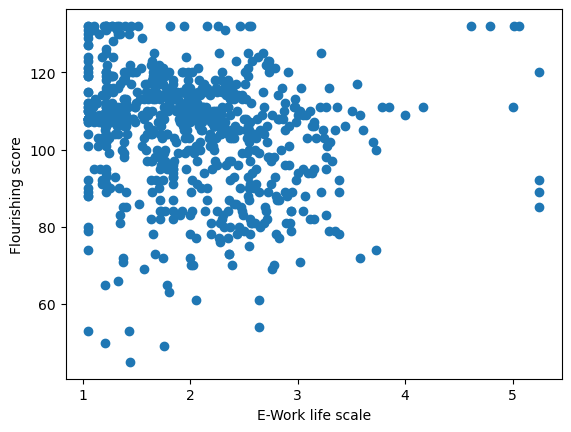

In [8]:
#plot a scatterplot of e work life scale and flourishing scores
plt.scatter(df['E-Work_life_scale'], df['flourishing_score'])
plt.xlabel('E-Work life scale')
plt.ylabel('Flourishing score')
plt.show()



In [11]:
from scipy.stats import pearsonr
    
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

newdf = df[['E-Work_life_scale', 'flourishing_score']]
corr = newdf.corr(method=pearsonr_pval)
print (corr)

                   E-Work_life_scale  flourishing_score
E-Work_life_scale           1.000000           0.000015
flourishing_score           0.000015           1.000000
